# Movie Rating Analytics

## Data Processing

In [3]:
import pandas as pd
import os

In [4]:
# Check working directory
os.getcwd()

'C:\\Users\\sstallworth'

In [5]:
# Import dataset
movies = pd.read_csv('Movie-Ratings.csv')

In [6]:
# Check length
len(movies)

559

In [7]:
# View first few rows
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [9]:
# Change column names
movies.columns = ['Film','Genre','CriticRating', 'AudienceRating', \
                  'BudgetMillions', 'Year']
movies

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
5,2012,Action,39,63,200,2009
6,27 Dresses,Comedy,40,71,30,2008
7,30 Days of Night,Horror,50,57,32,2007
8,30 Minutes or Less,Comedy,43,48,28,2011
9,50/50,Comedy,93,93,8,2011


In [10]:
# Identify variable types
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


Film and Genre are recognized as objects and the remaning columns are being treated as integers.

In [11]:
# Get stats on numeric variables
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRating,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillions,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0
Year,559.0,2009.152057,1.362632,2007.0,2008.0,2009.0,2010.0,2011.0


Look at the means from the chart above, it makes sense to treat Critic Rating, Audience Rating, and Budget as integers but not the year. Year is meant to be a categorical variable.

Also, Film and Genre are being recognized as just objects. Need to specify they are categorical variables also.  

In [12]:
# Convert to categorical variables
movies['Film'] = movies['Film'].astype('category') # movies.Films = movies.Film.astype('category')
movies['Genre'] = movies['Genre'].astype('category') # movies.Genre = movies.Genre.astype('category')
movies['Year'] = movies['Year'].astype('category') # movies.Year = movies.Year.astype('category')

In [13]:
# Could also do a for loop for multiple columns
# for col in ['Film', 'Genre', 'Year']:
   # movies[col] = movies[col].astype('category')

In [14]:
# Confirm column types were changed
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [15]:
# View unique values in a category
movies.Year.unique()

[2009, 2008, 2010, 2007, 2011]
Categories (5, int64): [2009, 2008, 2010, 2007, 2011]

In [16]:
# View unique categories
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [17]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


## Working with JointPlots
Plotting a joint dataset with bivariate and marginal distributions.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True


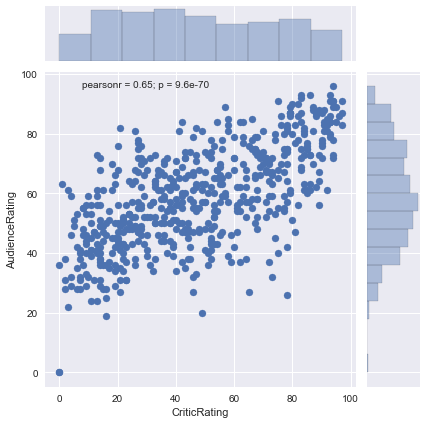

In [19]:
# Joint plots
j = sns.jointplot(data = movies, x = 'CriticRating',y='AudienceRating')

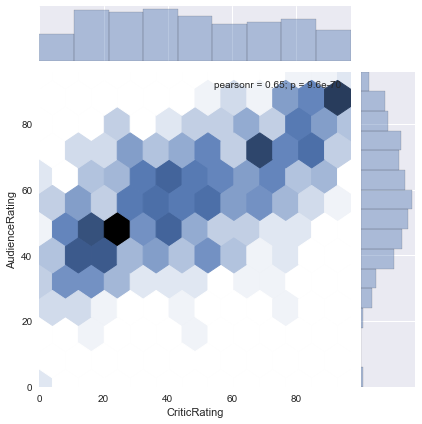

In [20]:
# Another way 
j = sns.jointplot(data = movies, x = 'CriticRating', y = 'AudienceRating', kind = 'hex')

Hexagon is quite useful for being able to see clusters of data points better.

---
### Histograms
Flexibly plot a **univariate** distribution of observations

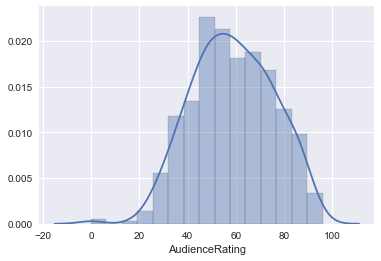

In [21]:
# Audience rating histogram using seaborn
ml = sns.distplot(movies.AudienceRating, bins = 15)   # sns.distplot(movies['AudienceRating'])

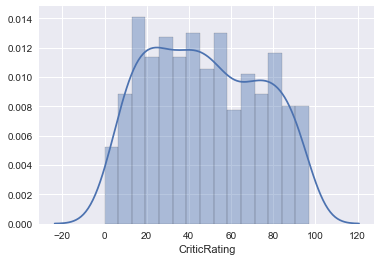

In [22]:
# Critic rating histogram using seaborn
m2 =sns.distplot(movies.CriticRating, bins =15)

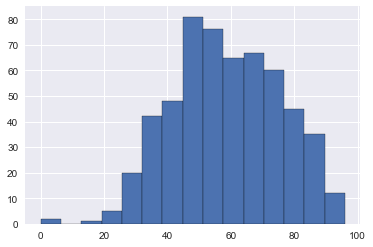

In [23]:
# Audience rating historgram using pyplot
sns.set_style('darkgrid') 
nl = plt.hist(movies.AudienceRating, bins = 15)

Audience rating appears normally distributed with the middle being somewhere around 50 or 60 percent range and drops off.

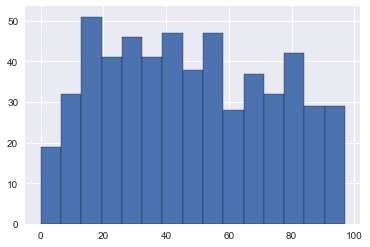

In [24]:
# Critic rating histogram using pyplot
nl= plt.hist(movies.CriticRating, bins = 15)

Critic ratings are more uniformly distributed

## Stacked Histograms

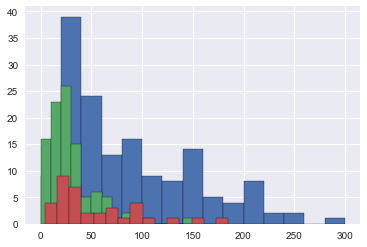

In [25]:
# Histogram with multiple genres
plt.hist(movies[movies.Genre=='Action'].BudgetMillions, bins = 15)# Create filter then apply to dataframe with brackets and grab BudgetMillions column
plt.hist(movies[movies.Genre =='Drama'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre =='Thriller'].BudgetMillions, bins = 15)
plt.show() # hides the additional information without having to assign plot to a variable

For histogram to be stacked, need to pass each genre into the plt.hist function as a list.

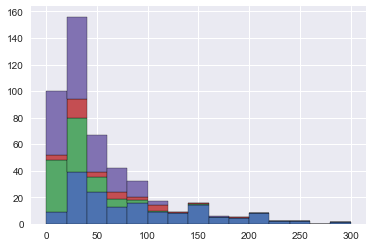

In [26]:
# Stacked histogram
plt.hist([movies[movies.Genre=='Action'].BudgetMillions,# notice beginning bracket
          movies[movies.Genre =='Drama'].BudgetMillions,
          movies[movies.Genre =='Thriller'].BudgetMillions,
          movies[movies.Genre =='Comedy'].BudgetMillions], # notice closing bracket
          bins = 15, stacked = True) 
plt.show()

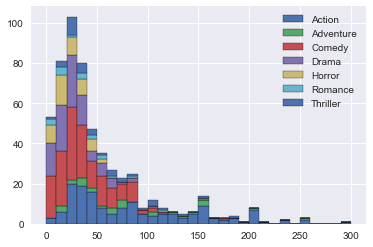

In [27]:
# Stacked histogram using for loop
list1 = list()  # or list1= []
mylabels = list()
for gen in movies.Genre.cat.categories: # variable that will iterate over list of genres
    list1.append(movies[movies.Genre==gen].BudgetMillions)
    mylabels.append(gen)
    
h = plt.hist(list1, bins = 30, stacked = True, rwidth = 1, label = mylabels)
plt.legend()
plt.show()

## Creating a KDE Plot

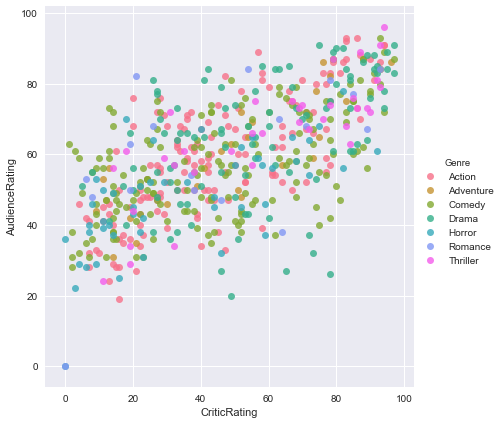

In [28]:
vis1= sns.lmplot(data = movies, x ='CriticRating', y= 'AudienceRating', 
                 fit_reg = False, hue = 'Genre',
                 size = 6 ,aspect = 1)

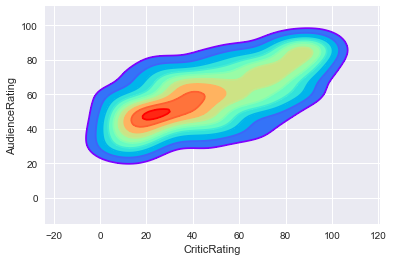

In [29]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade = True, shade_lowest = False, cmap = 'rainbow' )

# Tip: for smoother edges run this line first then re-reun k1
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating,\
                  cmap = 'rainbow')

KDE plots shows us where the most density is in the data much better than the scatter plot above.

## Working with Subplots

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

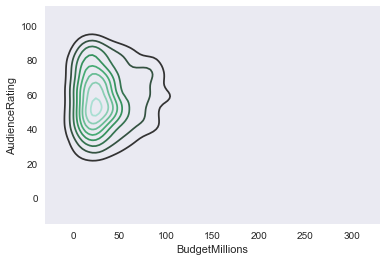

In [31]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions,movies.AudienceRating)

Audience ratings are concentrated around 50% and follows a uniform distribution.

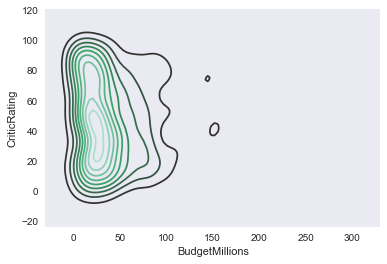

In [32]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

Shows us Critic Ratings are most concentrated around the 20 and 40 percent mark and then they stretch out. The plot also suggests more of a uniform distribution.

Creating a subplot would allow for better comparison of the two graphs.

[(-20, 160)]

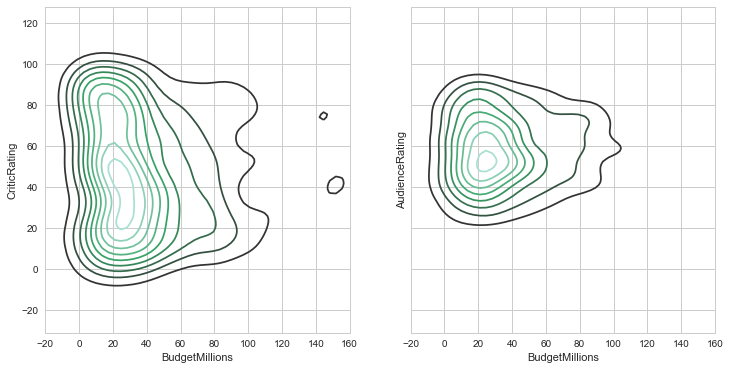

In [117]:
# Creating subplot
f, axes = plt.subplots(1,2, figsize = (12,6),sharex=True,sharey= True) # creates subplot of 1 row and 2 columns
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[1])
k1.set(xlim = (-20, 160)) 

By plotting them side by side, we can visualize how Audience ratings are much more compact than Critic ratings which are spread out.

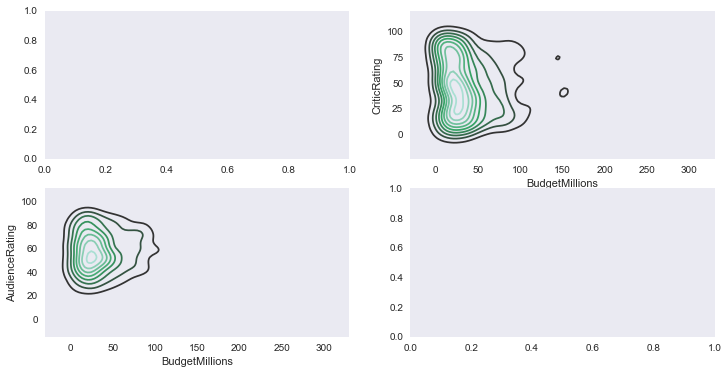

In [34]:
# Creating two dimensional set of subplots
f, axes = plt.subplots(2,2, figsize = (12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[0,1])
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[1,0])

## Violin Plots vs Box Plots

### Box Plots
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be "outliers" using a method that is a function of the inter-quartile range.

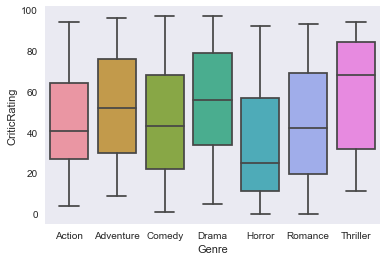

In [35]:
# Box plot
# w = sns.boxplot(x = movies.Genre, y = movies.CriticRating)
w = sns.boxplot(data = movies, x = 'Genre', y = 'CriticRating') # x-axis is categorical for box plots

The median critic rating is the lowest for Horror movies and the highest median critic rating is for thrillers.  
For each boxplot, the smaller piece means more dots fall in that area.  


### Violin Plots
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) **categorical variables** such that those distributions can be compared. 

Two columns are required to create a Violin plot: one categorical, one numeric.

Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

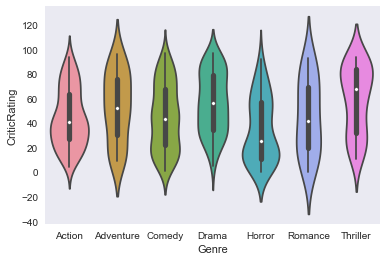

In [36]:
# Violin plots
#z = sns.violinplot(movies.Genre, movies.CriticRating)
z = sns.violinplot(data = movies, x = 'Genre', y = 'CriticRating')

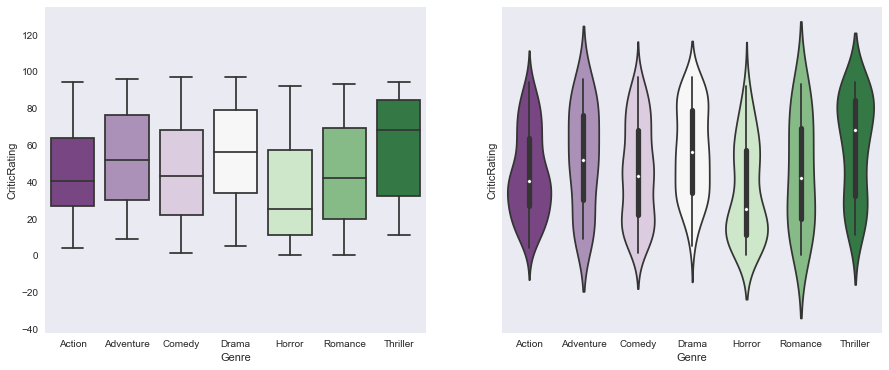

In [37]:
# Creating two dimensional set of subplots
f, axes = plt.subplots(1,2, figsize = (15,6), sharex=True, sharey = True)
w = sns.boxplot(data = movies, x ='Genre', y = 'CriticRating', ax = axes[0], palette='PRGn' )
z = sns.violinplot(data= movies, x = 'Genre', y = 'CriticRating',ax = axes[1],palette='PRGn' )

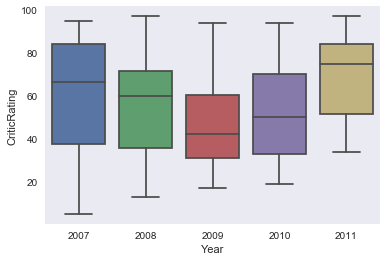

In [38]:
# Boxplot for Drama genre
w = sns.boxplot(data= movies[movies['Genre']=='Drama'], x = 'Year', y  = 'CriticRating')

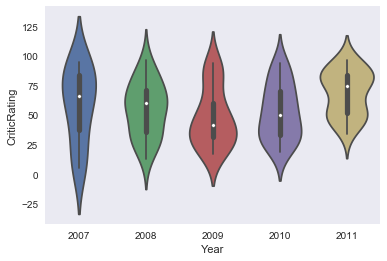

In [39]:
# Violin plot for Drama genre
z = sns.violinplot(data = movies[movies['Genre']=='Drama'], x = 'Year', y = 'CriticRating')

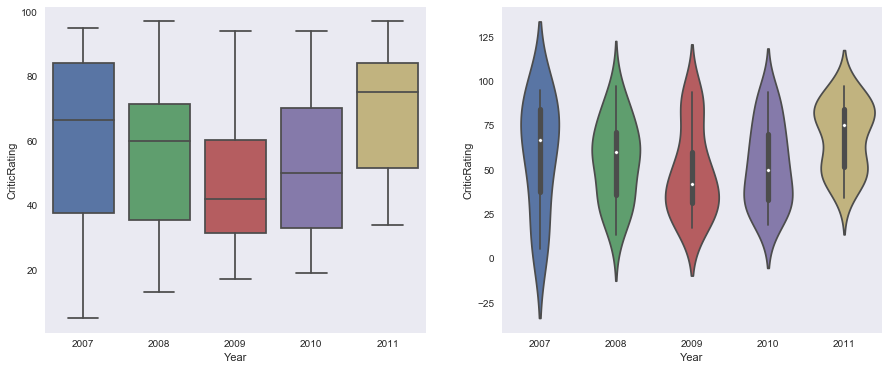

In [40]:
# Drama box plot vs Drama violin plot
f, axes = plt.subplots(1,2, figsize = (15,6))
w = sns.boxplot(data = movies[movies['Genre']=='Drama'], x = 'Year', y = 'CriticRating', ax = axes[0])
z = sns.violinplot(data= movies[movies['Genre']=='Drama'], x = 'Year', y = 'CriticRating', ax = axes[1])

## Creating a Facet Grid
### Example 1: Scatterplot

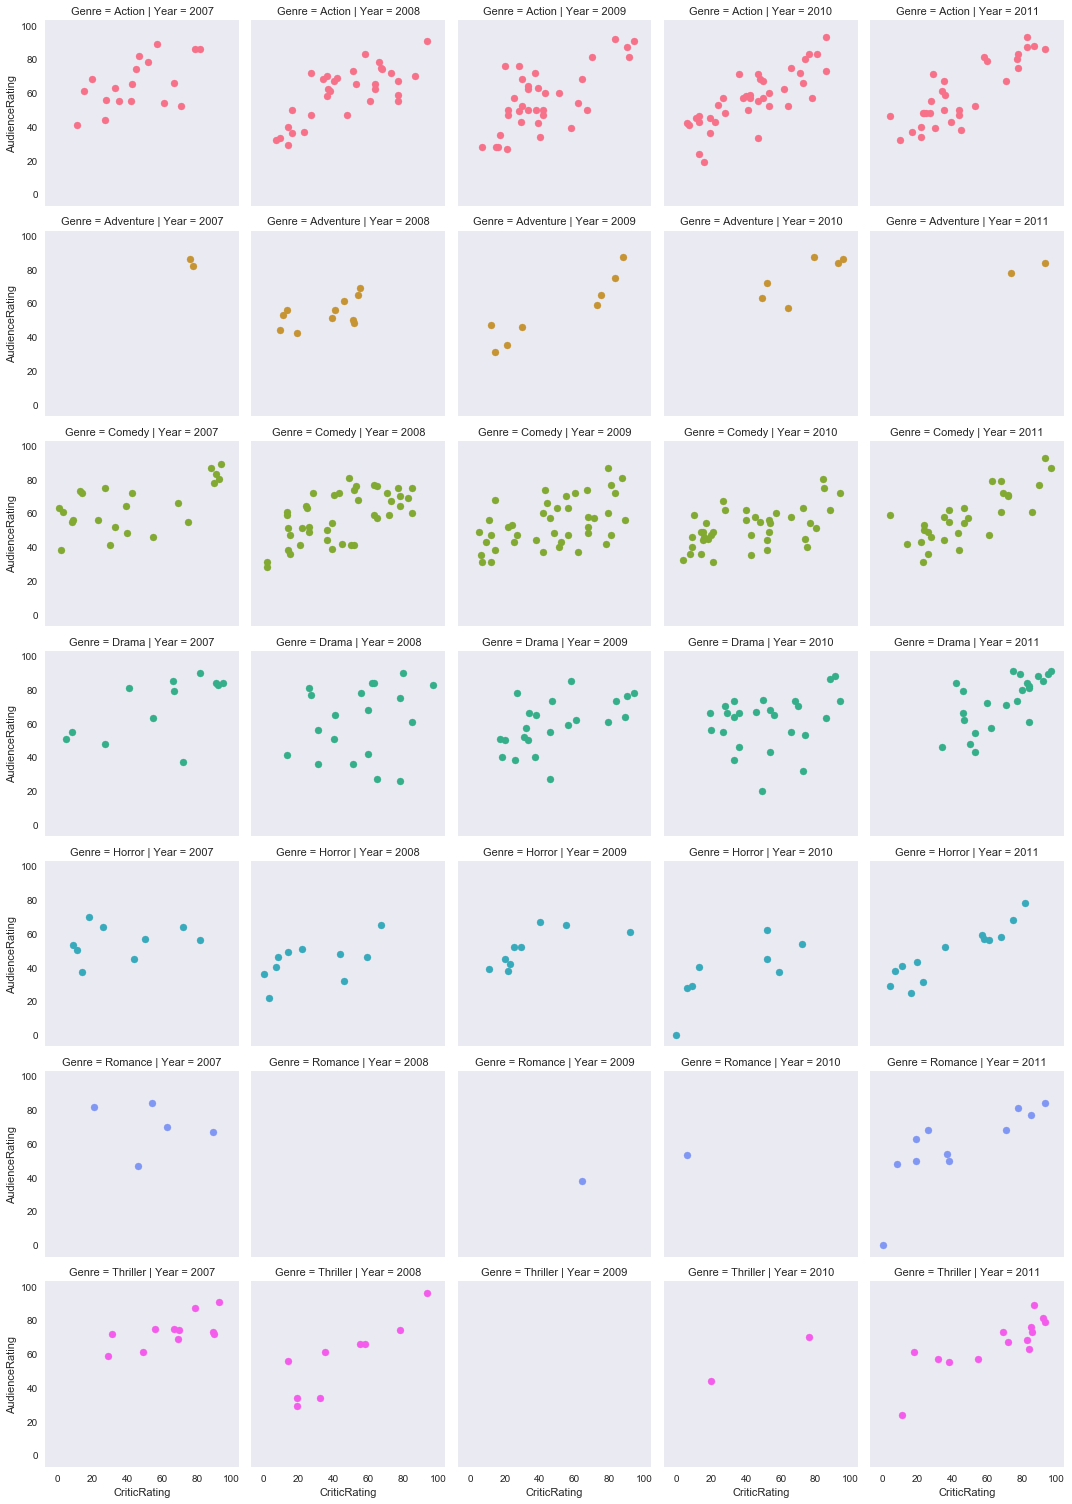

In [41]:
# Construct facit grid
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')

# Create scatter plot to split across the construct created 
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating') # movies already specified above, can remove movies. prefix

Built scatterplots above, but FacetGrid can be populated with any types of chart.

### Example 2: Histograms

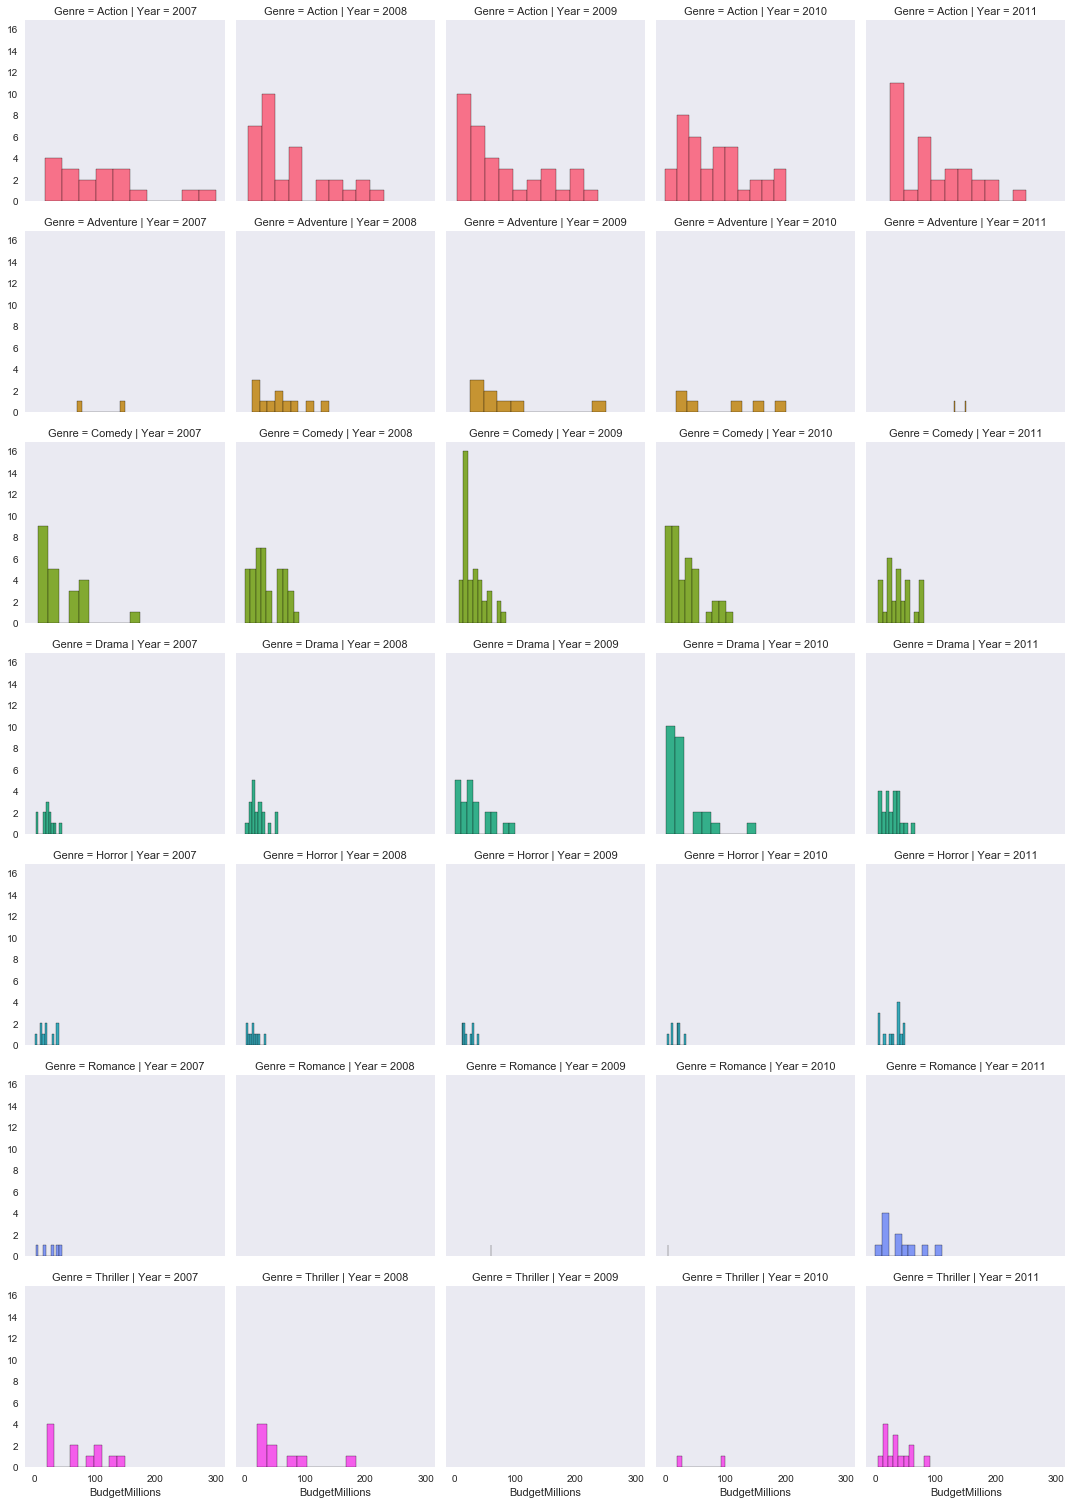

In [42]:
# Construct facet grid
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')

# Create scatter plot to split across the construct created 
g = g.map(plt.hist, 'BudgetMillions') # only need one variable for histograms!

### Example 3: Scatterplot with Keyword Arguments
Studying how the relationship between Audience Rating and Critic Rating evolved throughout the years

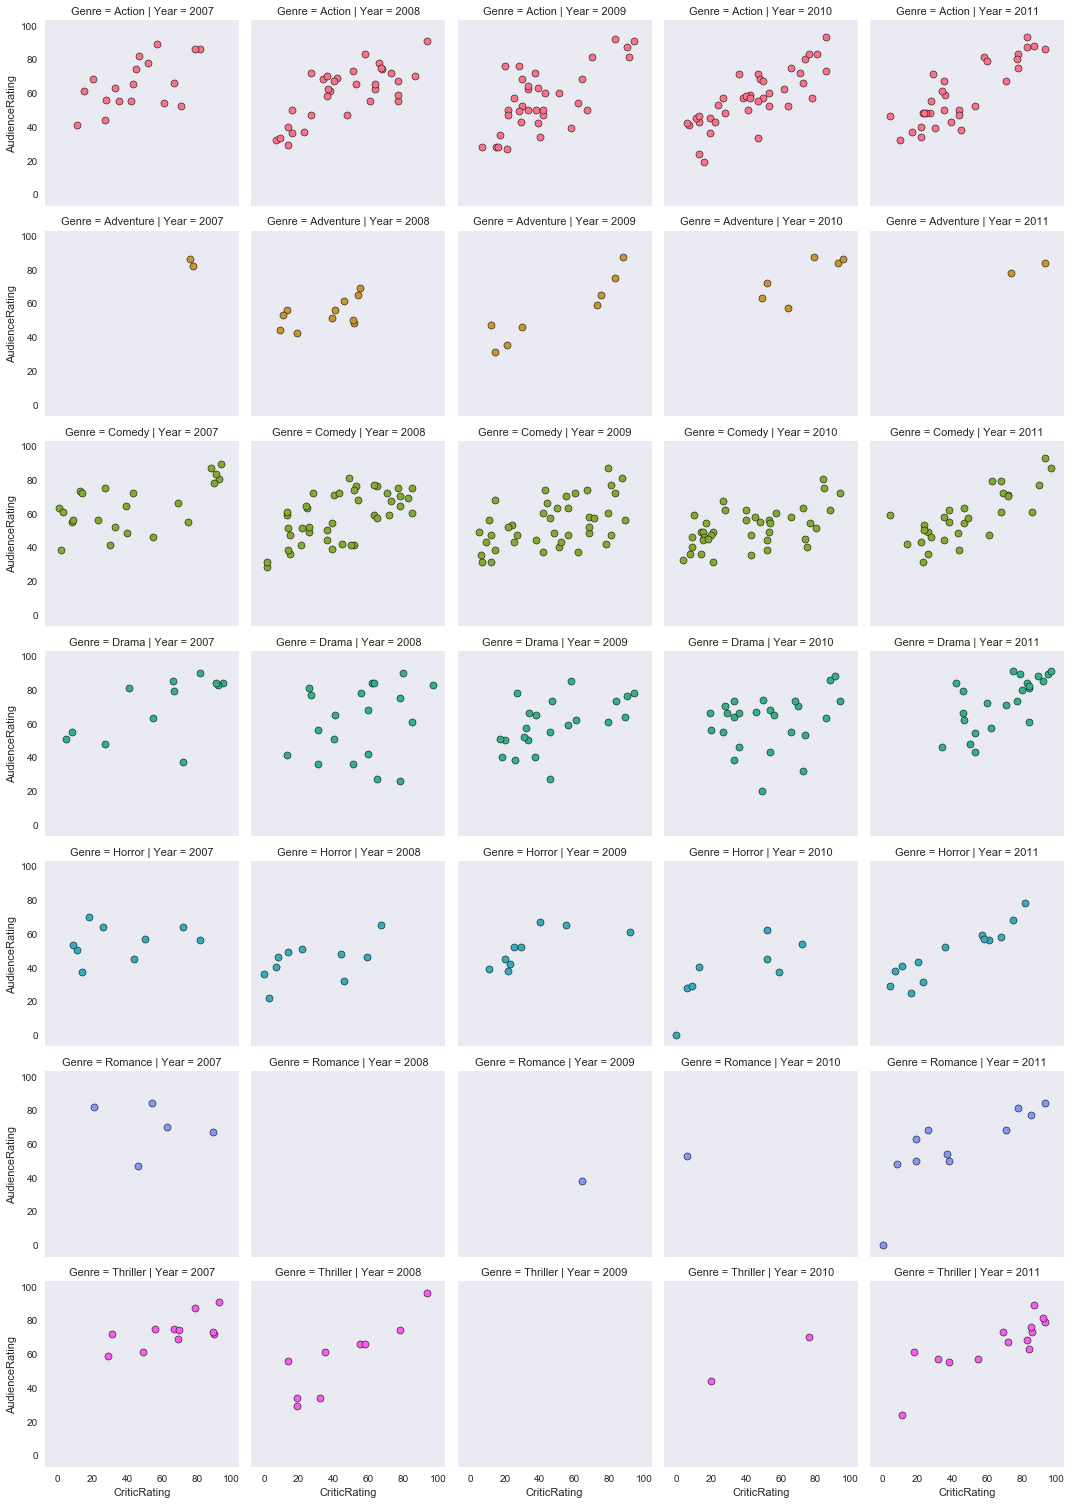

In [43]:
# Construct facit grid
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')

# Create scatter plot to split across the construct created 
kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black') 
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws) # pass keywords dictionary to make points bigger

In [44]:
# Check newly created dictionary
kws

{'edgecolor': 'black', 'linewidth': 0.5, 's': 50}

Remember: in a dictionary, elements are not stored in a particular order because the keys are what matters.

## Coordinates and Diagonals
Controlling Axes and Adding Diagonals

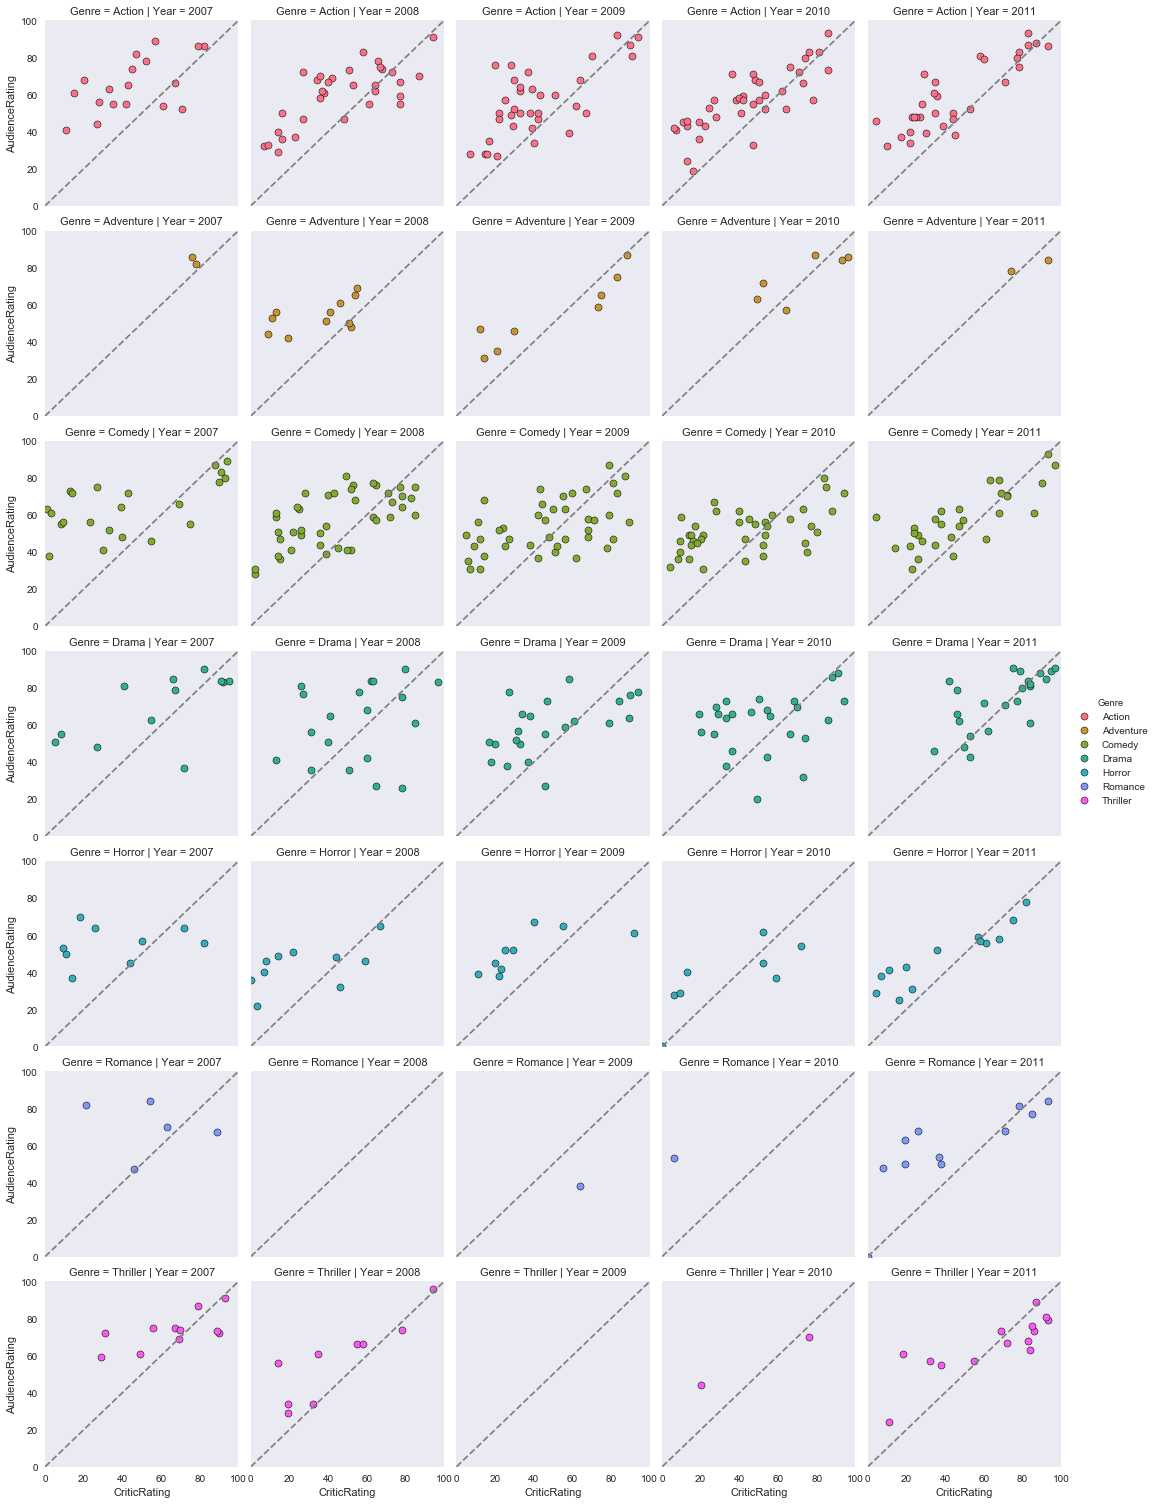

In [45]:
# Construct facit grid
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year', hue = 'Genre')

# Create scatter plot to split across the construct created 
kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black') 
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws) # pass keywords dictionary to make points bigger
g.set(xlim =(0,100), ylim = (0,100))
for ax in g.axes.flat: # We're taking g, using .axes to access all these elements (plots) of the facet grid and using flat to flatten out this area so can iterate over it
    ax.plot((0,100),(0,100), c = 'gray',ls = '--') # x and y axis
g.add_legend()

Whenever a dot is above the diagonal line, it means that Audience Rating for that genre was greater than the Critic Rating.

## Building Dashboards in Python

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True

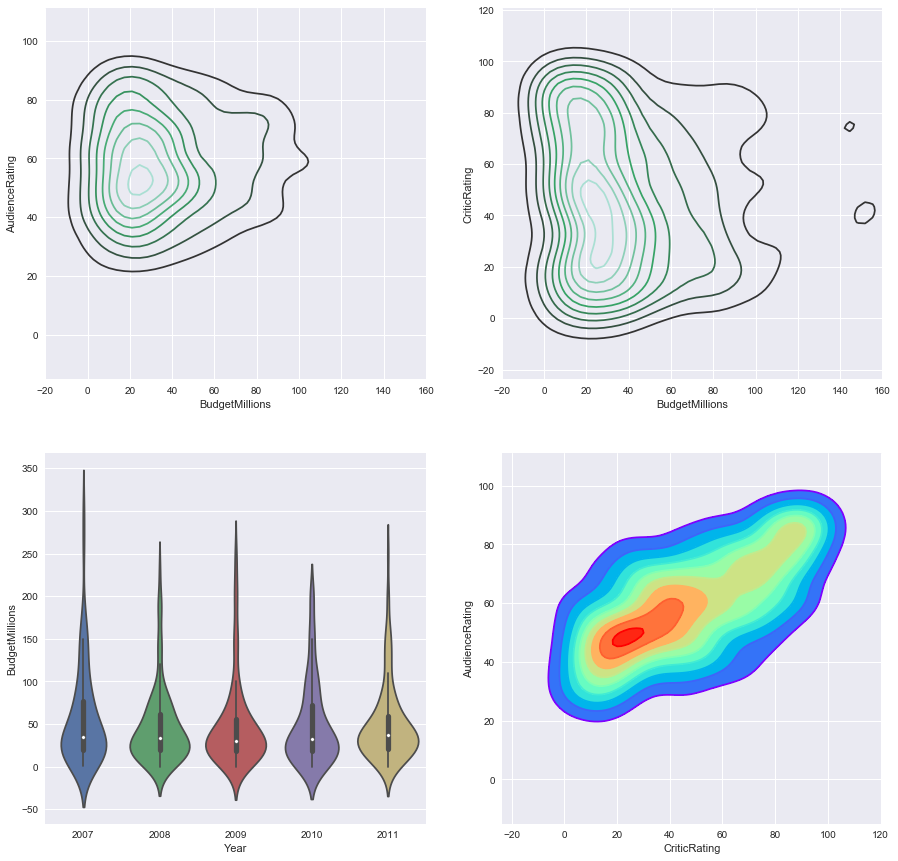

In [77]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 ax = axes[0,0])

# Plot [0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating,\
                 ax = axes[0,1])

k1.set(xlim = (-20, 160))
k2.set(xlim = (-20, 160))  # show axis on each separate plot

# Plot [1,0]
z = sns.violinplot(data = movies, \
                   x = 'Year', y = 'BudgetMillions', ax = axes[1,0])

# Plot [1,1]
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade = True, shade_lowest = False, cmap = 'rainbow',\
                 ax = axes[1,1])

# Tip: for smoother edges 
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating,\
                 cmap = 'rainbow', ax = axes[1,1])

# axes[1,1].hist(movies.CriticRating, bins = 15) # adding graph that is not seaborn

plt.show()

# Styling Dashboards

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True

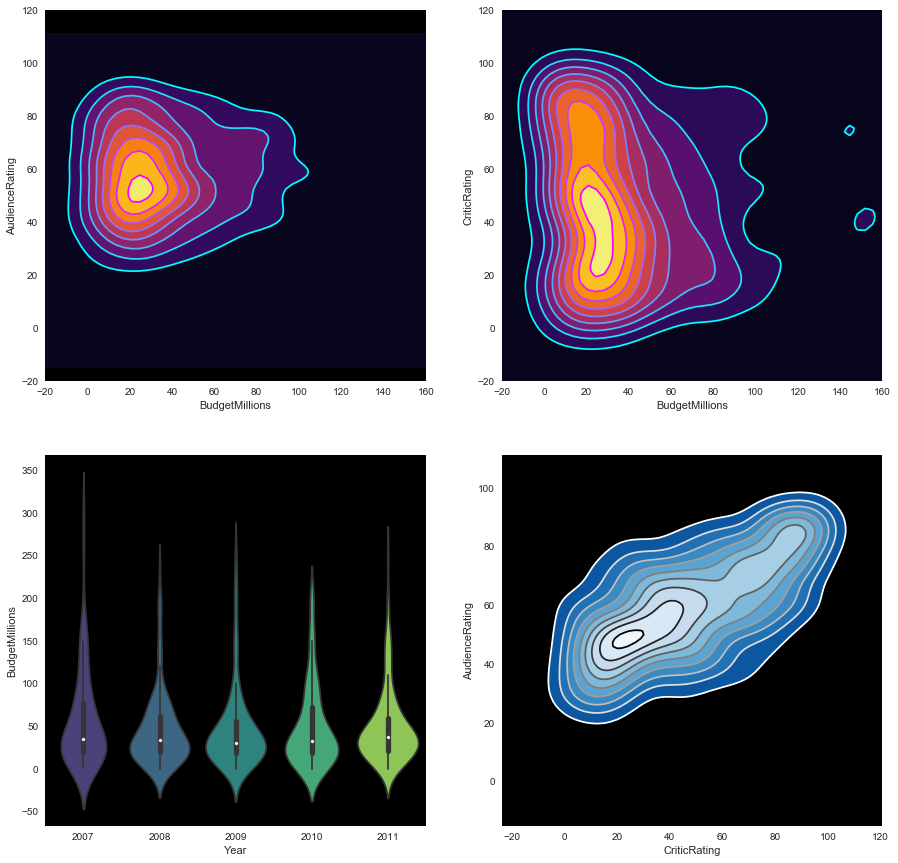

In [118]:
sns.set_style('dark',{'axes.facecolor':'black'}) # pre-defined options are white, whitegrid, dark, darkgrid, ticks so need to pass keyword argument
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 shade = True, shade_lowest = True, cmap = 'inferno',\
                 ax = axes[0,0])

k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 cmap = 'cool', ax = axes[0,0])
# Plot [0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating,\
                 shade = True, shade_lowest = True, cmap = 'inferno',\
                 ax = axes[0,1])

k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating,\
                 cmap = 'cool', ax = axes[0,1])

k1.set(xlim = (-20, 160), ylim = (-20,120))
k2.set(xlim = (-20, 160), ylim = (-20,120))  # show axis for each separate plot


# Plot [1,0]
z = sns.violinplot(data = movies,\
                   x = 'Year', y = 'BudgetMillions', ax = axes[1,0], \
                  palette = 'viridis')

# Plot [1,1]
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade = True, shade_lowest = False, cmap = 'Blues_r',\
                 ax = axes[1,1])

# Tip: for smoother edges 
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating,\
                 cmap = 'gist_gray_r', ax = axes[1,1])
plt.show()

### Color Map Options
Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

## Finishing Touches

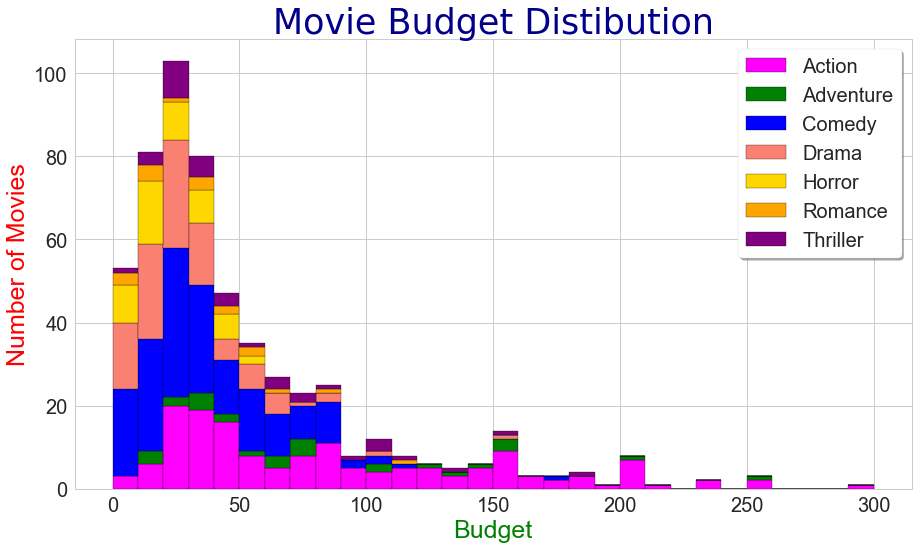

In [116]:
# Stacked histogram with thematic edits
list1 = list()  # or list1= []
mylabels = list()
for gen in movies.Genre.cat.categories: # variable that will iterate over list of genres
    list1.append(movies[movies.Genre==gen].BudgetMillions)
    mylabels.append(gen)

# Create histogram    
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15,8.27) # width x height size of A4 paper 11.7 x 8.27
h = plt.hist(list1, bins = 30, stacked = True, rwidth = 1, label = mylabels, \
             color = ['Fuchsia','Green','Blue','Salmon','Gold','Orange','Purple']) # see color options below
# Add title
plt.title('Movie Budget Distibution', fontsize = 35,\
          color = 'DarkBlue', fontname = 'Console')

# Add axis labels
plt.ylabel('Number of Movies', fontsize = 25, color = 'Red')
plt.xlabel('Budget', fontsize = 25, color = 'Green')

# Format tick marks
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

# Format legend
plt.legend(frameon = True, fancybox = True, shadow = True,\
           framealpha = 1, prop = {'size':20})
plt.show()

### RGBA Color Options

aqua, aquamarine, azure, beige, black, blue, brown, chartreuse, chocolate, coral, crimson, cyan, darkblue, darkgreen, fuchsia, gold, goldenrod, green, grey, indigo, ivory, khaki, lavender, lightblue, lightgreen, lime, magenta, maroon, navy, olive, orange, orangered, orchid, pink, plum, purple, red, salmon, sienna, silver, tan, teal, tomato, turquoise, violet, wheat, white, yellow
yellowgreen